In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_notas = pd.read_csv('./data/infobae_notas.csv', index_col = 0)
df = pd.read_csv('./data/commentarios_infobae.csv', index_col = 0)

In [3]:
#Cantidad de notas recopiladas y cantidad de comments totales
df_notas.shape[0], df.shape[0]

(862, 46191)

In [4]:
#cantidad de recopiladas por sección
df_notas.groupby('seccion').count()

,abierta_comentarios,autor,cuerpo,fecha,titulo,url,keywords
seccion,,,,,,,
america/mundo,145,4,145,145,145,145,145
deportes-2,145,17,139,145,145,145,145
economia,138,72,138,138,138,138,138
politica,145,43,145,145,145,145,145
sociedad,144,29,142,144,144,144,144
teleshow/infoshow,145,20,144,145,145,145,145


In [5]:
#dimensiones de cada dataset
df_notas.columns

Index(['abierta_comentarios', 'autor', 'cuerpo', 'fecha', 'seccion', 'titulo',
       'url', 'keywords'],
      dtype='object')

In [6]:
df.columns

Index(['es_respuesta', 'fecha', 'likes', 'respuestas', 'texto', 'usuario',
       'seccion', 'titulo', 'url', 'severe_toxicity', 'toxicity'],
      dtype='object')

In [7]:
df_notas.autor.unique()

array([nan, 'Martín Luciano Insaurralde', 'Luis Beldi', 'Román Lejtman',
       'Fernando Morales', 'Silvia Mercado', 'Fernando Soriano',
       'Gustavo Yarroch', 'Francisco Bueno', 'Ernesto Tenembaum',
       'Luis Novaresio', 'Omar Lavieri', 'Gustavo López', 'Martín Angulo',
       'Pablo Wende', 'Loreley Gaffoglio', 'Gastón Calvo', 'Juan Gasalla',
       'Ximena Casas', 'Eduardo Aulicino', 'Mauricio Luna',
       'Cherquis Bialo', 'Laura Rocha', 'Pablo Riggio', 'Milagros Monti',
       'Gustavo Segré', 'Daniel Sticco', 'Federico Mayol',
       'Pilar Safatle', 'Mariel Fitz Patrick', 'Carlos Arbia',
       'Juan Piscetta', 'Fernanda Kobelinsky', 'Milton Del Moral',
       'Leonardo Mindez', 'Fernanda Jara', 'Nieves Otero',
       'Darío Mizrahi', 'Claudia Peiró', 'Martín Dinatale',
       'Gisele Sousa Dias', 'Tatiana Schapiro', 'Matías Bauso',
       'Mariano Thieberger', 'Agustina Larrea', 'Mariana Dahbar',
       'Daniela Lichinizer', 'Patricia Blanco', 'Gerardo González',
      

In [8]:
#Cantidad de notas firmadas
df_notas.autor.notnull().sum()

185

In [9]:
#promedio toxicity notas firmadas contra anonimas.
df = df.merge(df_notas[['autor','titulo']], how ='left', on = 'titulo')
df['firmada'] = df.autor.notnull()
df.groupby('firmada').mean().toxicity

firmada
False    0.285158
True     0.267221
Name: toxicity, dtype: float64

In [10]:
#promedio toxicity por genero de autor
#promedio toxicity por genero de autor
autores = pd.read_csv('./data/autores_infobae.csv', index_col = 0)
df.merge(autores, how ='left', on = 'autor').groupby('genero').mean().toxicity


genero
female    0.276791
male      0.256558
Name: toxicity, dtype: float64

In [11]:
#cantidad de comentarios por sección 
df.groupby('seccion').count()['texto']

seccion
america/mundo         2181
deportes-2            4188
economia              9036
politica             16908
sociedad             10043
teleshow/infoshow     4844
Name: texto, dtype: int64

C:\Users\p_bag\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


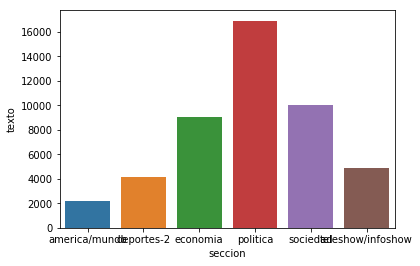

In [12]:
sns.barplot(df.groupby('seccion').count().index, df.groupby('seccion').count().texto)

In [13]:
#promedio de comentarios por sección
df.groupby('titulo').count().merge(df_notas, how = 'left', on = 'titulo').groupby('seccion_y').mean().texto

seccion_y
america/mundo         21.174757
deportes-2            33.504000
economia              77.896552
politica             133.843972
sociedad              76.901515
teleshow/infoshow     36.977099
Name: texto, dtype: float64

In [14]:
#promedio de toxicidad por sección
df.groupby('seccion').mean().toxicity

seccion
america/mundo        0.311975
deportes-2           0.262892
economia             0.228657
politica             0.291347
sociedad             0.300805
teleshow/infoshow    0.295221
Name: toxicity, dtype: float64

In [15]:
#promedio de toxicidad severa por sección
df.groupby('seccion').mean().severe_toxicity

seccion
america/mundo        0.312666
deportes-2           0.204083
economia             0.179382
politica             0.245778
sociedad             0.271506
teleshow/infoshow    0.234767
Name: severe_toxicity, dtype: float64

In [16]:
#cantidad comentarios con más de 500 caracteres
df.texto = df.texto.apply(lambda x : x.replace('\r','').replace('\n',''))
df['caracteres'] = df.texto.apply(len)
df.loc[df.caracteres > 500].shape[0]

1553

In [17]:
#cantidad comentarios de 500 caracteres sin espacio
df['caracteresSE'] = df.texto.apply(lambda x: len(x) - x.count(' '))
df.loc[df.caracteresSE > 500].shape[0]

890

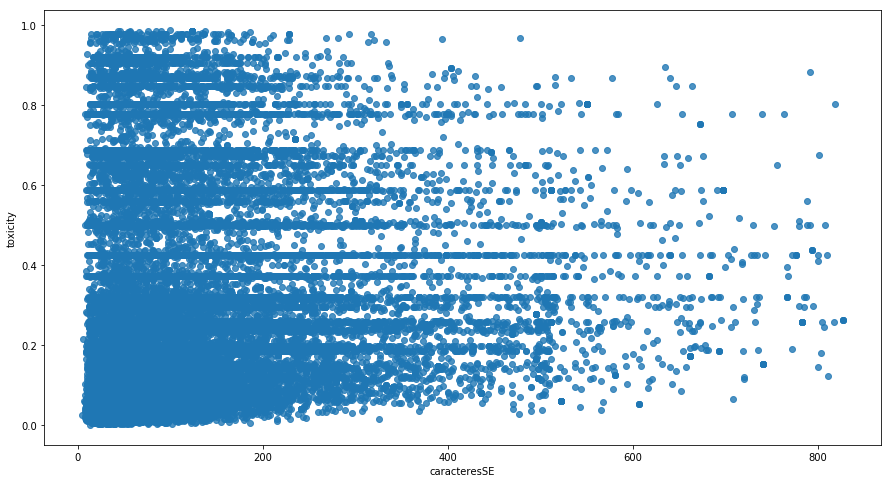

In [19]:
#toxicity x caracteres (sin contar espacios)
plt.figure(figsize = (15, 8))
sns.regplot(df.caracteresSE, df.toxicity, fit_reg=False)

In [14]:
#porcentaje de comentarios "es_respuesta" por sección
df.groupby('seccion').mean().es_respuesta *100

seccion
america/mundo        47.455296
deportes-2           39.374403
economia             44.477645
politica             37.969358
sociedad             49.990016
teleshow/infoshow    27.167630
Name: es_respuesta, dtype: float64

In [15]:
#porcentaje de categorias
import glosariosRe

In [16]:
import re
misoginos = df.loc[df.texto.str.contains(glosariosRe.misoginos, flags = re.IGNORECASE, na = False)]
racistas = df.loc[df.texto.str.contains(glosariosRe.racistas, flags = re.IGNORECASE, na = False)]
xenofobos = df.loc[df.texto.str.contains(glosariosRe.xenofobos, flags = re.IGNORECASE, na = False)]
ideologicos = df.loc[df.texto.str.contains(glosariosRe.ideologicos, flags = re.IGNORECASE, na = False)]
violentos = df.loc[df.texto.str.contains(glosariosRe.violentos, flags = re.IGNORECASE, na = False)]
homofobicos = df.loc[df.texto.str.contains(glosariosRe.homofobicos, flags = re.IGNORECASE, na = False)]
periodistas = df.loc[df.texto.str.contains(glosariosRe.periodistas, flags = re.IGNORECASE, na = False)]

/home/pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/home/pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
/home/pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
/home/pablo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/home/pablo/anaconda3/lib/python3.6/site-packa

In [22]:
import numpy as np
def porcentajes(df):
    return (df.seccion.value_counts()/df.seccion.value_counts().sum()*100).astype(int)
def graficar(df):
    plt.ylim(0, 62)
    sns.barplot(porcentajes(df).index, porcentajes(df).values)

C:\Users\p_bag\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


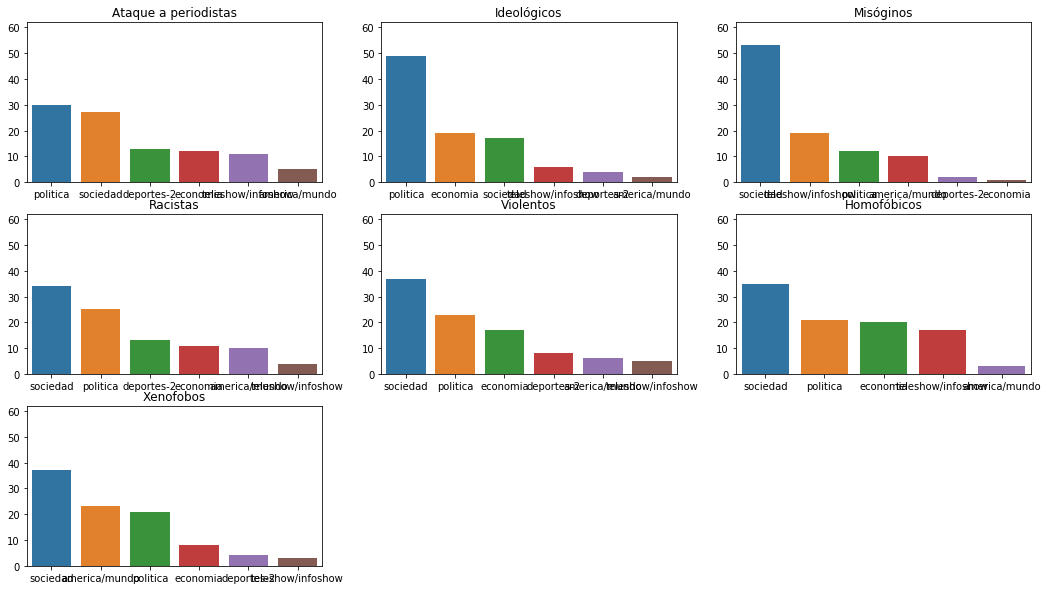

In [22]:
#distribución porcentual de categoría en secciones
plt.figure(figsize=(18,10))
plt.subplot(331)
plt.title('Ataque a periodistas')
graficar(periodistas)
plt.subplot(332)
plt.title('Ideológicos')
graficar(ideologicos)
plt.subplot(333)
plt.title('Misóginos')
graficar(misoginos)
plt.subplot(334)
plt.title('Racistas')
graficar(racistas);
plt.subplot(335)
plt.title('Violentos')
graficar(violentos);
plt.subplot(336)
plt.title('Homofóbicos')
graficar(homofobicos);
plt.subplot(337)
plt.title('Xenofobos')
graficar(xenofobos);

In [34]:
#porcentajes de comentarios de cada categoría sobre total de comentarios

In [26]:
misoginos.shape[0]/df.shape[0]*100

0.5477257474399775

In [27]:
racistas.shape[0]/df.shape[0] *100

0.22731700980710529

In [28]:
violentos.shape[0]/df.shape[0] *100

0.3377281288562707

In [29]:
homofobicos.shape[0]/df.shape[0] *100

0.16886406442813534

In [33]:
xenofobos.shape[0]/df.shape[0] *100

0.3550475200796692

In [31]:
ideologicos.shape[0]/df.shape[0] *100

1.0738022558507068

In [32]:
periodistas.shape[0]/df.shape[0] *100

0.5931891494013986

Quedaría: 
-Temas con mayor cantidad de comentarios? Cómo se agruparía por temas
´-ver cuando no entiende toxicity?
